In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
image = cv2.imread('lena.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Original Image Histogram')

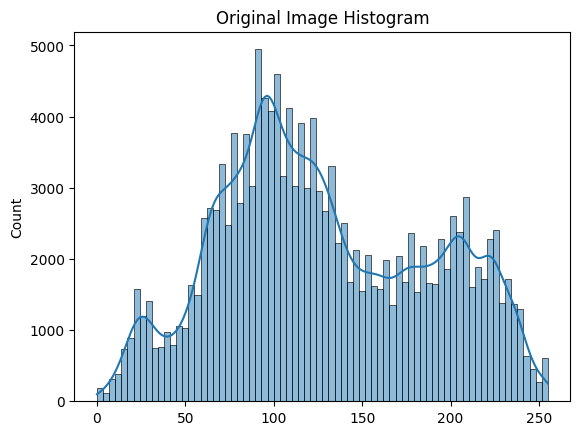

In [3]:
sns.histplot(image.flatten(),kde =True)
plt.title('Original Image Histogram')

# Histogram Shifting and Equalization

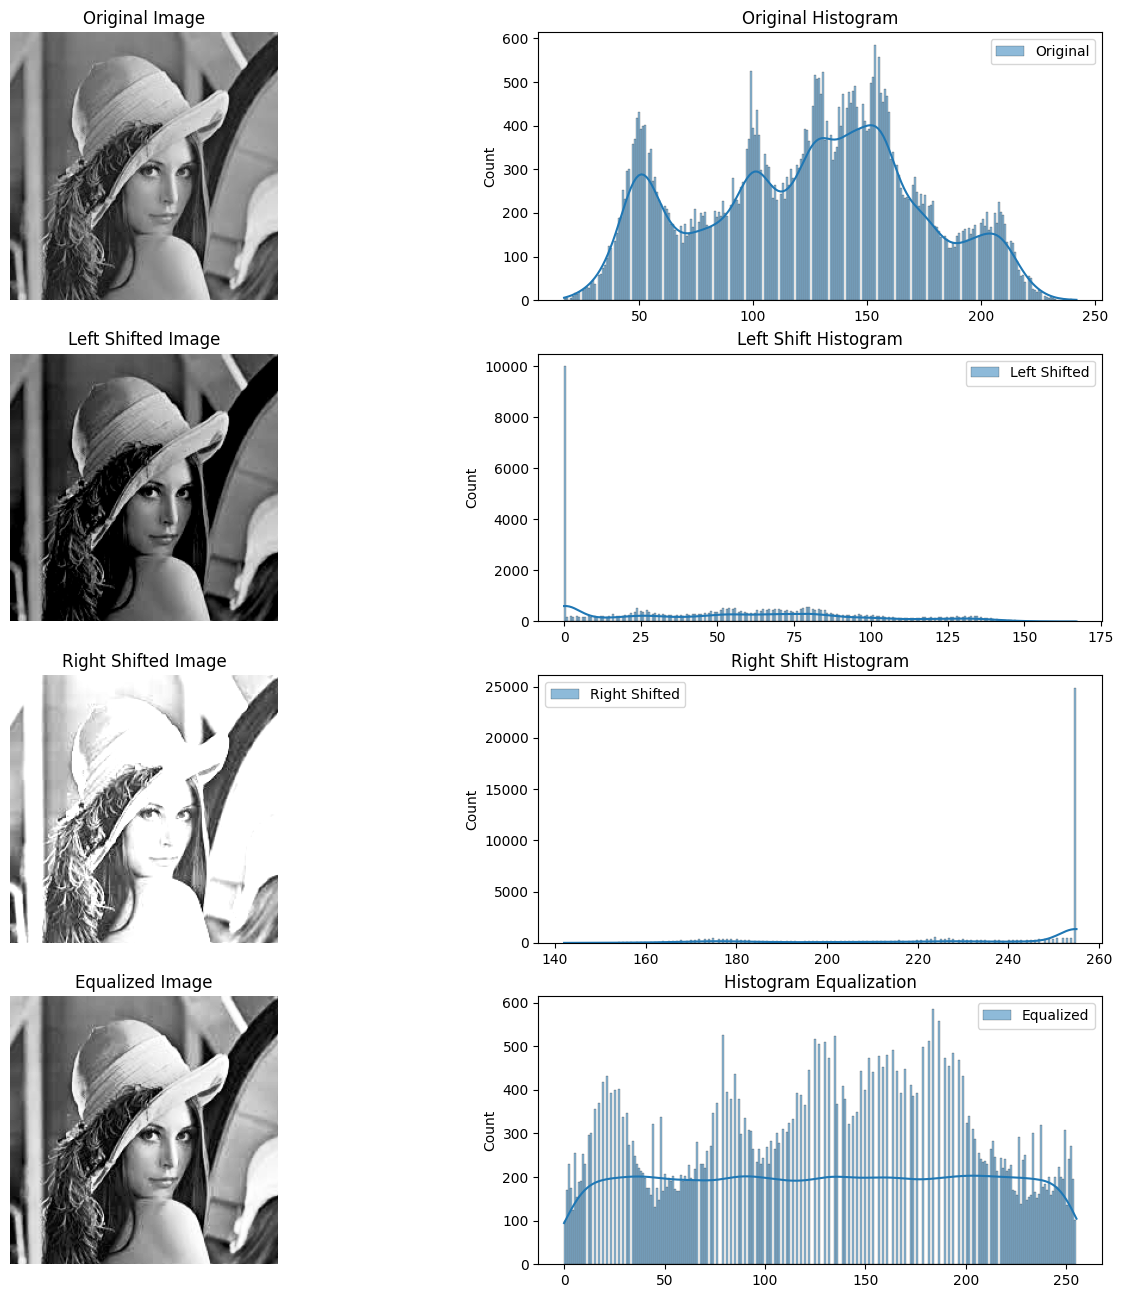

In [4]:
def process_histogram(image: np.ndarray, method='shift', shift_value=50):
    
    if method == 'shift':
        if shift_value >= 0:
            processed_image = cv2.add(image, shift_value)
        else:
            processed_image = cv2.subtract(image, abs(shift_value))
    elif method == 'equalize':
        processed_image = cv2.equalizeHist(image)
    else:
        raise ValueError("Invalid method. Use 'shift' or 'equalize'.")
    
    return processed_image

image = cv2.imread("lena.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
right_shifted_img = process_histogram(image, method='shift', shift_value=125)
    
left_shifted_img = process_histogram(image, method='shift', shift_value=-75)

equalized_img = process_histogram(image, method='equalize')

plt.figure(figsize=(16, 16))

plt.subplot(4, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('Off')
plt.subplot(4,2,2)
sns.histplot(image.ravel(), bins=256, alpha=0.5, label="Original", kde=True)
plt.legend()
plt.title("Original Histogram")

plt.subplot(4, 2, 3)
plt.imshow(left_shifted_img, cmap='gray')
plt.title('Left Shifted Image')
plt.axis('Off')
plt.subplot(4,2,4)
sns.histplot(left_shifted_img.ravel(), bins=256, alpha=0.5, label="Left Shifted", kde=True)
plt.legend()
plt.title("Left Shift Histogram")

plt.subplot(4, 2, 5)
plt.imshow(right_shifted_img, cmap='gray')
plt.title('Right Shifted Image')
plt.axis('Off')
plt.subplot(4,2,6)
sns.histplot(right_shifted_img.ravel(), bins=256, alpha=0.5, label="Right Shifted", kde=True)
plt.legend()
plt.title("Right Shift Histogram")

plt.subplot(4, 2, 7)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('Off')
plt.subplot(4,2,8)
sns.histplot(equalized_img.ravel(), bins=256, alpha=0.5, label="Equalized", kde=True)
plt.legend()
plt.title("Histogram Equalization")
plt.show()

# Negative image

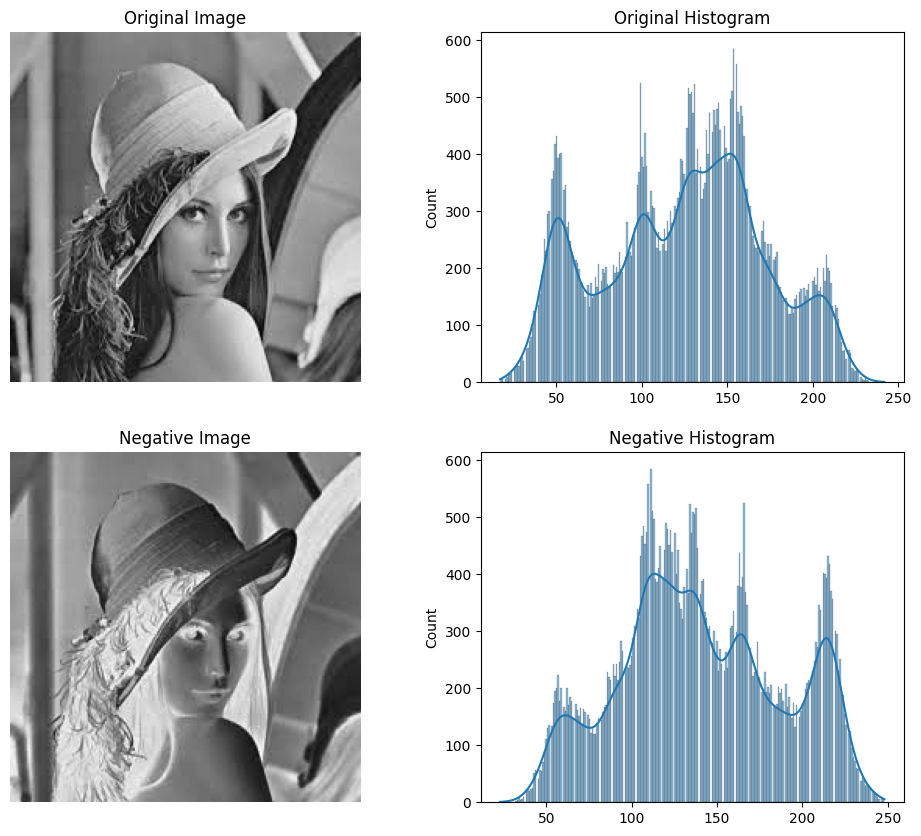

In [5]:
L = 2 ^ 8
S = (L-1) -image
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('Off')

plt.subplot(2,2,2)
sns.histplot(image.ravel(), bins=256, alpha=0.5, kde=True)
plt.title("Original Histogram")

plt.subplot(2, 2, 3)
plt.imshow(S, cmap='gray')
plt.title('Negative Image')
plt.axis('Off')

plt.subplot(2,2,4)
sns.histplot(S.ravel(), bins=256, alpha=0.5, kde=True)
plt.title("Negative Histogram")
plt.show()

# Image Blurring

In [6]:
def linear_filters(img , Filter):
    
    h,w=img.shape
    bordered_img = np.zeros((h+2,w+2) , dtype=np.uint8)
    bordered_img[ 1:h+1 , 1:w+1 ] = img

    kernel = 0
    match Filter:
        case 'blur':
            Kernel=np.ones((3,3))/9 
        case 'sharp':
            Kernel=np.array([[0,0,0],[0,2,0],[0,0,0]]) -( np.ones((3,3))/9)
        case 'Gx':
            Kernel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) 
        case 'Gy' : 
            Kernel=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
        case 'Gaussian':
            Kernel=np.array([[0.075, 0.125, 0.075],[0.125, 0.200, 0.125],[0.075, 0.125, 0.075]])
        case _:
            raise ValueError("The value of argument Filter is wrong")

    filtered_img = np.zeros_like(img)
    for i in range(1,h+1):
        for j in range(1,w+1):
            window = bordered_img[ i-1:i+2 , j-1:j+2 ]
            matrix = Kernel * window
            avg = np.sum(matrix)//2
            filtered_img[i-1,j-1] = max(0 , min(255 , avg))
    return filtered_img
    

In [7]:
def Sobel_filter(img):
    Gx = linear_filters(img , 'Gx').astype(np.int64)
    Gy = linear_filters(img , 'Gy').astype(np.int64)
    G = np.clip(np.sqrt(Gx**2 + Gy**2) , 0 ,255)
    return G.astype(np.uint8)

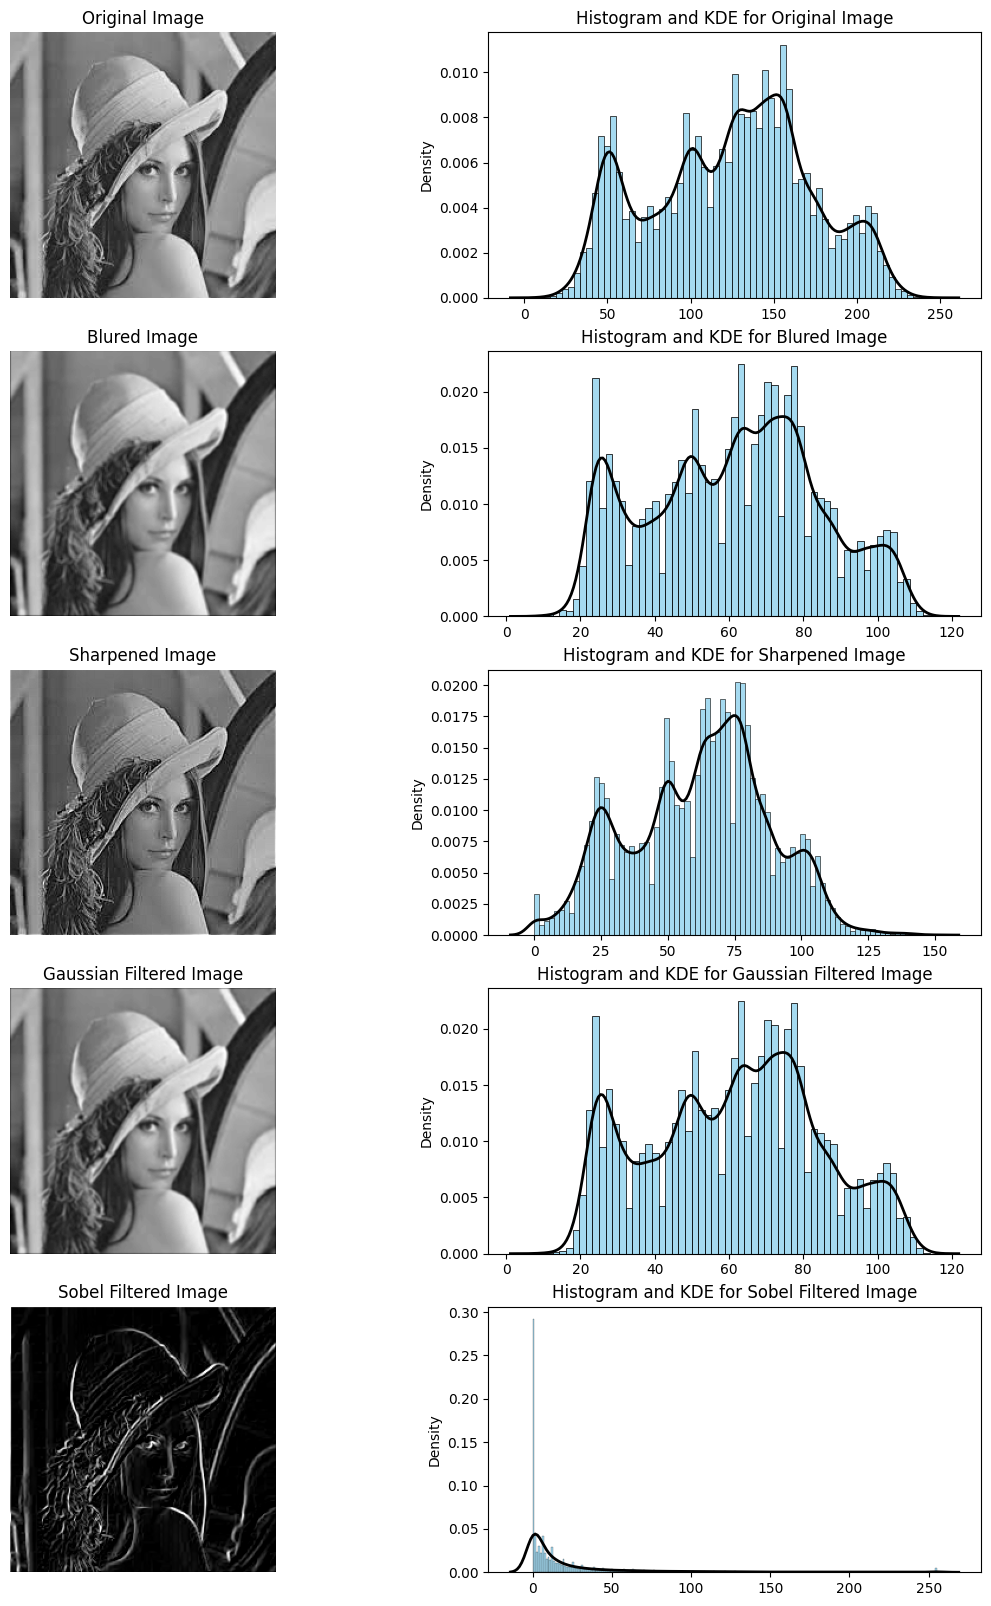

In [8]:
img = cv2.imread("lena.jpeg",0)
fig , axes= plt.subplots(5,2 , figsize = (14,20))

img_lst = [img ,linear_filters(img,'blur') ,linear_filters(img,'sharp') , linear_filters(img,'Gaussian')  , Sobel_filter(img)]

title = ['Original' , 'Blured' , 'Sharpened' , 'Gaussian Filtered' , 'Sobel Filtered']

for i in range(5):
    axes[i,0].imshow(img_lst[i] , cmap='gray')
    axes[i,0].axis('off')
    axes[i,0].set_title(f'{title[i]} Image')
    sns.histplot(img_lst[i].ravel() , kde = False  , ax=axes[i,1] , color='skyblue' , stat='density')
    sns.kdeplot(img_lst[i].ravel()  , linewidth=2 , color='black' , ax=axes[i,1]  )
    axes[i,1].set_title(f'Histogram and KDE for {title[i]} Image')

# DFT

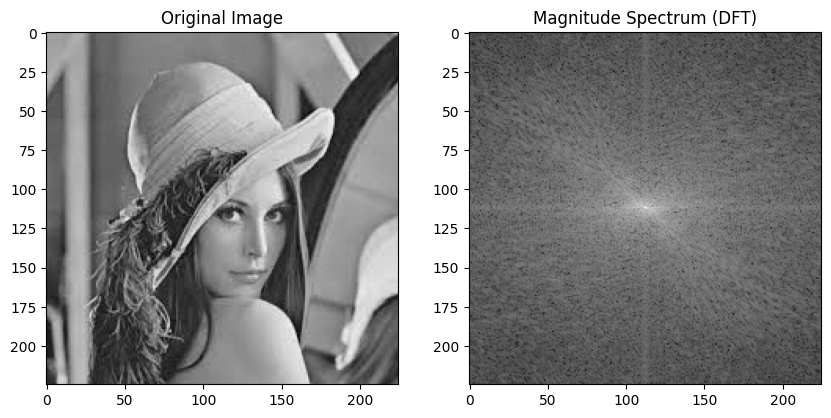

In [9]:
def dft_image(image_path):
    
    img = cv2.imread(image_path, 0)
    
    # Perform DFT and shift zero frequency component to the center
    dft = np.fft.fft2(img)
    dft_shifted = np.fft.fftshift(dft)
    
    # Calculate magnitude spectrum (log scale for better visibility)
    magnitude_spectrum = np.log(np.abs(dft_shifted) + 1)
    
    # Display the original image and the magnitude spectrum
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum (DFT)')
    
    plt.show()

dft_image('Lena.jpeg')

# Thresholding

In [10]:
def bw_transform(img , val):
    bw_img = np.zeros_like(img)
    bw_img[img > val] = 255
    return bw_img

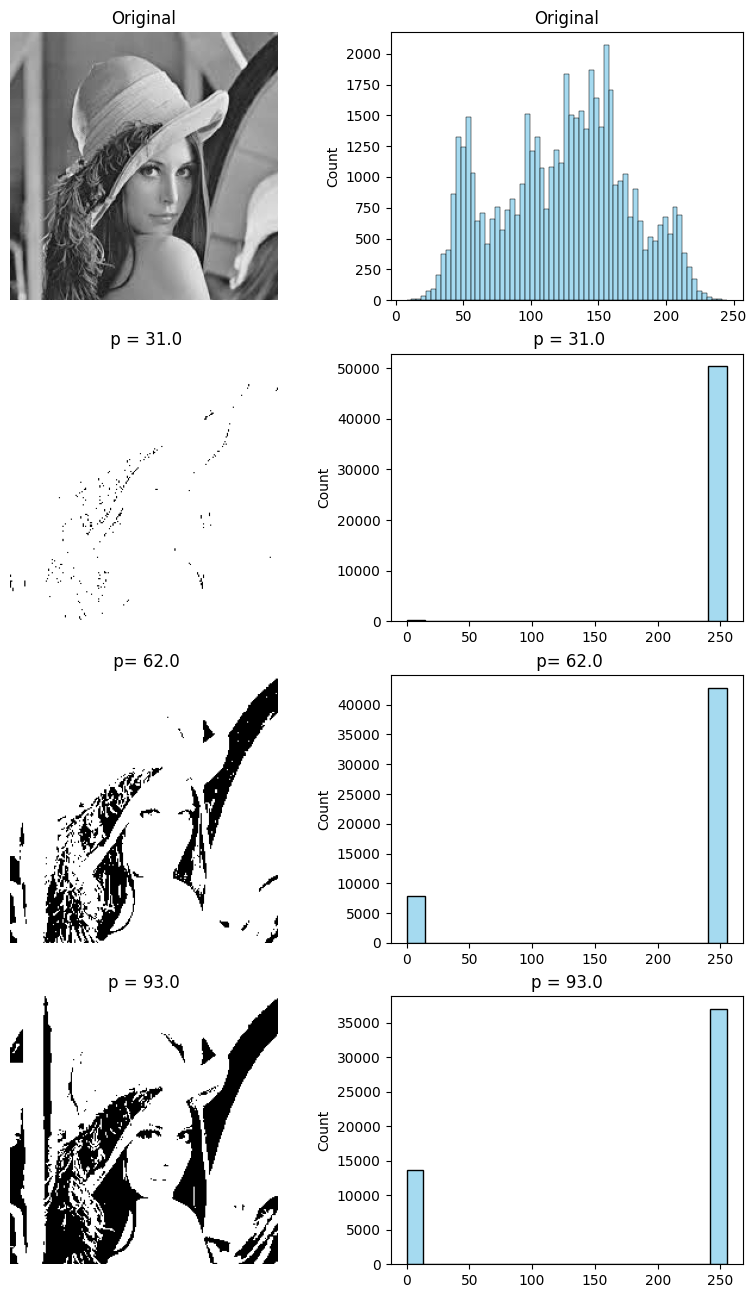

In [11]:
fig , axes = plt.subplots(4,2 , figsize = (10,16))

mean =np.round( np.mean(img))

lst = [img , bw_transform(img , mean/4) , bw_transform(img , mean/2) , bw_transform(img , 3*mean/4)]

title = ['Original',f' p = {mean//4}',f' p= {mean//2}',f'p = {3 *mean//4}']

for i in range(4):
    axes[i,0].imshow( lst[i] , cmap='gray')
    axes[i,0].set_title(title[i])
    axes[i,0].axis('off')
    sns.histplot(lst[i].ravel() , kde = False  , ax=axes[i,1] , color='skyblue')
    axes[i,1].set_title(title[i])

    

# Contrast

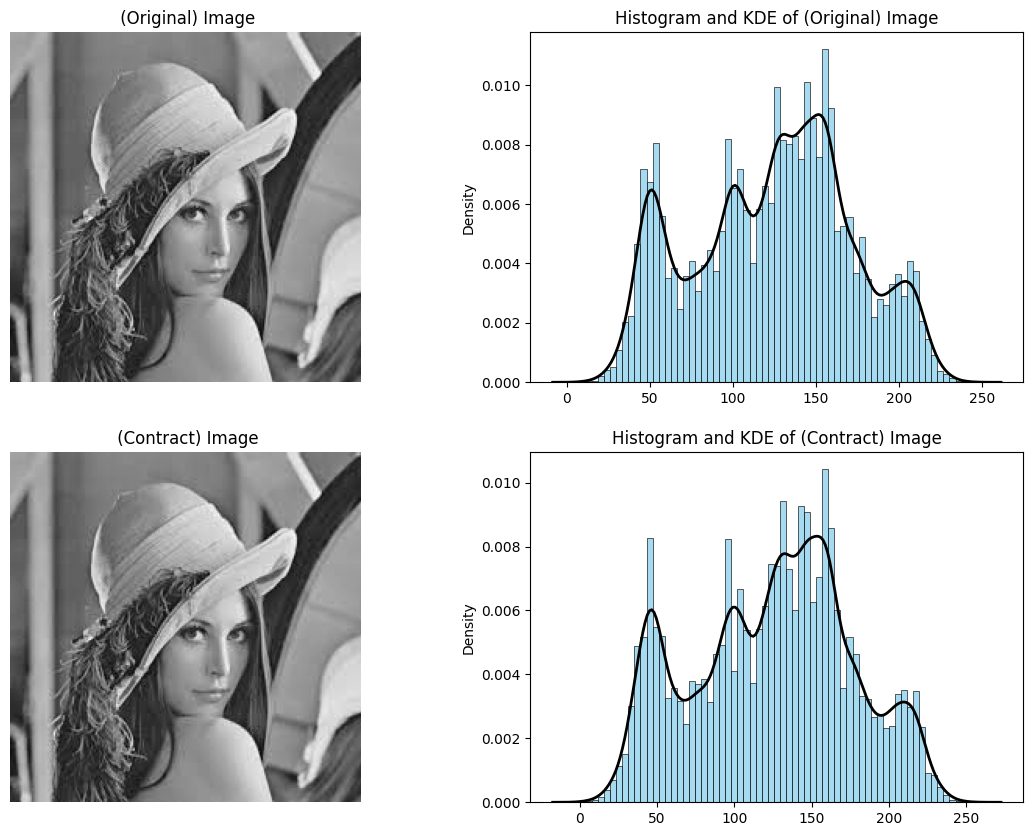

In [12]:
fig , axes= plt.subplots(2,2 , figsize = (14,10))

title= ['Original','Contract']

Min,Max = np.min(img),np.max(img)

contrast_img=img.copy().astype(np.int64)
contrast_img=(contrast_img-Min)*255/(Max-Min)
contrast_img=contrast_img.astype(np.uint8)


lst = [img , contrast_img]

for i in [0,1 ]:
    axes[i,0].imshow(lst[i] , cmap='gray')
    axes[i,0].set_title(f' ({title[i]}) Image')
    axes[i,0].axis('off')
    sns.kdeplot(lst[i].ravel()  , linewidth=2 , color='black' , ax=axes[i,1]  )
    sns.histplot(lst[i].ravel() , kde = False  , ax=axes[i,1]  ,stat='density' , color='skyblue')
    axes[i,1].set_title(f'Histogram and KDE of ({title[i]}) Image')
